In [1]:
import zftracker as zf

In [14]:
heatmap_model_path = "models/resnet18_offset_001_check_001_2x2_NDC_3_NKP_3_DO_05_rgrsFL_a05_g1_200ep_ra_2_6_datav10_dcn_v2.pth"
geometric_model_path = "models/geo_dense_nlayer_1_unit_128.pth"

video_path = 'clips/output_5.mp4.avi'

# horizontal_cut = (250, 1730) # 1080 x 1480
horizontal_cut = (0, 1920)
rotate = False # To horizontal
fps_divisor = 2 # 240 fps -> 120 fps
batch_size = 8 # Memory Size

In [18]:
pipeline = zf.inference.pipeline.PipelineV3(
    heatmap_model_path=heatmap_model_path,
    geometric_model_path=geometric_model_path,
    num_fish=24,
    file_path=video_path,
    horizontal_cut=horizontal_cut,
    rotate=rotate,
    fps_divisor=fps_divisor,
    batch_size=batch_size)

Loading model...
Model loaded to cuda in 0.45 seconds.


Frame Shape: (920, 1480, 3)


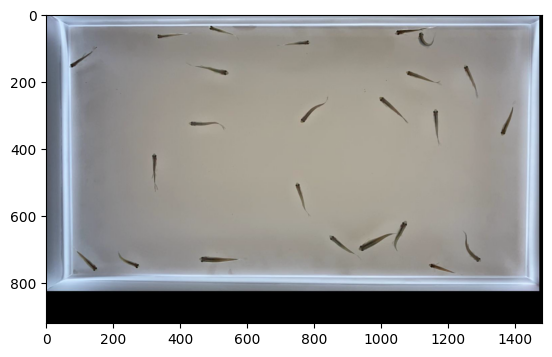

In [19]:
frame = pipeline.show_preprocessed_frame()
print(f"Frame Shape: {frame.shape}")

In [20]:
traj_pool = pipeline(verbose=True)

  0%|          | 0/2403 [00:00<?, ?it/s]

Step 1: Building the trajectory pool.


  0%|          | 0/1201 [00:00<?, ?it/s]

Total: 50.32s
Step 2: Pairing the trajectories.
Coarse Pair: 0.00s, Fine Pair: 0.01s, Total: 0.01s
Step 3: Refining the trajectories.
Refine: 0.01s, Interpolate: 0.01s, Total: 0.02s


In [30]:
test = traj_pool.coords_numpy()
test.shape

(1202, 156)

In [35]:
traj_pool.visualize_raw_timeline(min_traj_length=16)

TypeError: TrajectoryPoolV2.visualize_raw_timeline() missing 1 required positional argument: 'min_traj_length'

In [33]:
26*6

156

In [ ]:
"initial", "coarse", "fine", "interpolate"

In [ ]:
traj_pool[0].get_pairing_timeline()

['initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'initial',
 'in

In [42]:
traj_pool.save_confs_numpy("confs.npy")

In [39]:
import numpy as np

In [43]:
coords = np.load("coords.npy")
confs = np.load("confs.npy")

In [41]:
coords.shape

(1200, 42)

In [60]:
color_map = zf.visual.videos.draw_trajectory_on_video(
    ['clips/240430_00_100.mp4'],
    traj_pool,
    output_file='clips/240430_00_100_out.mp4',
    fps_divisor=fps_divisor,
    rotate=rotate,
    add=horizontal_cut[0]
)

  0%|          | 0/1200 [00:00<?, ?it/s]